In [390]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [406]:
data = pd.read_csv("../datasets/logreg.csv")
data.sample(frac = 1)
x,y = data.drop("y", axis = 1),data["y"]
x = np.array(x)

array([[ 2.781084,  2.550537],
       [ 1.465489,  2.362125],
       [ 3.396562,  4.400294],
       [ 1.38807 ,  1.85022 ],
       [ 3.064072,  3.005306],
       [ 7.627531,  2.759262],
       [ 5.332441,  2.088627],
       [ 6.922597,  1.771064],
       [ 8.675419, -0.24207 ],
       [ 7.673756,  3.508563]])

In [392]:
def predict(x,theta,bias):
    gx = 1/(1+np.exp(-(np.dot(x,theta) + bias)))
    return gx

In [393]:
def accuracy(y,predicted):
    return np.sum(y==prediction)/len(prediction)*100

In [394]:
def update(x,y,prediction,bias,theta,alpha):
    delB = (np.sum(prediction - y))/len(y)
    delW = (np.dot((prediction - y),x))/len(y)

    b = bias - alpha*delB
    t = theta - alpha*delW
    return b, t

In [395]:
def cost(actual, predicted):
    n = len(actual)
    return -(np.sum(actual*np.log(predicted) + (1-actual)*np.log(1-predicted)))/n

In [396]:
def gradientDescent(x,y,alpha,epoch):
    bias = 0
    thetas = np.zeros(x.shape[1])
    costs = []
    bHist,tHist = [],[]
    a =[]

    for i in range(epoch):
        prediction = predict(x,thetas,bias)
        bias, thetas = update(x,y,prediction,bias,thetas,alpha)
        newCost = cost(y,prediction)
        
       
        costs.append(newCost)
        tHist.append(thetas)
        bHist.append(bias)
        a.append(accuracy(y,prediction))

    return thetas,bias,tHist,bHist, costs, a



In [397]:
weight, bias, weights, biases, costs, acc = gradientDescent(x,y,epoch=50,alpha = 0.04)


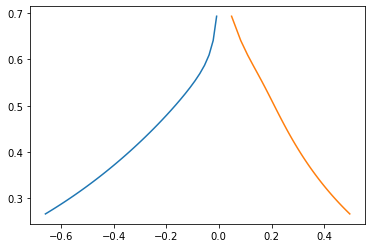

In [399]:
b1,b2 = [],[]
for i in weights:
    b1.append(i[0])
    b2.append(i[1])
plt.plot(b2, costs)
plt.plot(b1, costs)

In [400]:
prediction = predict(x,weight, bias)

In [401]:
for i in range(len(prediction)):
    if prediction[i]>0.5:
        prediction[i] = 1
    else:
        prediction[i] = 0


In [402]:
print(np.sum(y==prediction)/len(prediction)*100 , "%")

100.0 %


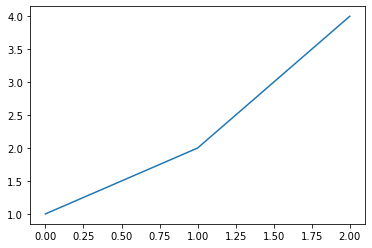

In [403]:
plt.plot(a)

In [423]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [425]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(x, y)
sklearn_accuracy = accuracy_score(y, lr.predict(x))
print(f"Accuracy using scikit-learn = {sklearn_accuracy * 100:.2f}%")

Accuracy using scikit-learn = 100.00%
